#### The purpose of this notebook is to perform initial exploratory data analysis on the CLV data. Keep in mind that our target column is `future_spend`

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_parquet("../data/processed/clv_table_data.parquet")

In [12]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 36086 entries, 0 to 36085
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   customer_id           36086 non-null  int64          
 1   transaction_count     36086 non-null  int64          
 2   promo_code_used       36086 non-null  int64          
 3   quantity              36086 non-null  int64          
 4   total_spent           36086 non-null  float64        
 5   avg_order_value       36086 non-null  float64        
 6   first_purchase_date   36086 non-null  datetime64[us] 
 7   last_purchase_date    36086 non-null  datetime64[us] 
 8   recency               36086 non-null  timedelta64[us]
 9   customer_age          36086 non-null  timedelta64[us]
 10  payment_method_count  36086 non-null  int64          
 11  future_spend          36086 non-null  float64        
dtypes: datetime64[us](2), float64(3), int64(5), timedelta64[us](2)
memory u

In [13]:
df.duplicated().any()

np.False_

__Future spend(our target) description. About 25% did not spend again__

In [14]:
df["future_spend"].describe()

count    3.608600e+04
mean     2.275011e+06
std      3.814080e+06
min      0.000000e+00
25%      0.000000e+00
50%      7.180870e+05
75%      2.811686e+06
max      5.152548e+07
Name: future_spend, dtype: float64

__Distribution of average spending per customer__

In [15]:
(df["total_spent"] / df["transaction_count"]).describe()

count    3.608600e+04
mean     1.738991e+06
std      6.019733e+06
min      2.745000e+04
25%      2.902960e+05
50%      5.414944e+05
75%      1.322951e+06
max      4.239979e+08
dtype: float64

__The data is skewed a lot to the right, very few customers spent a lot, not out of the ordinary. A small number of customers spend really large amounts__

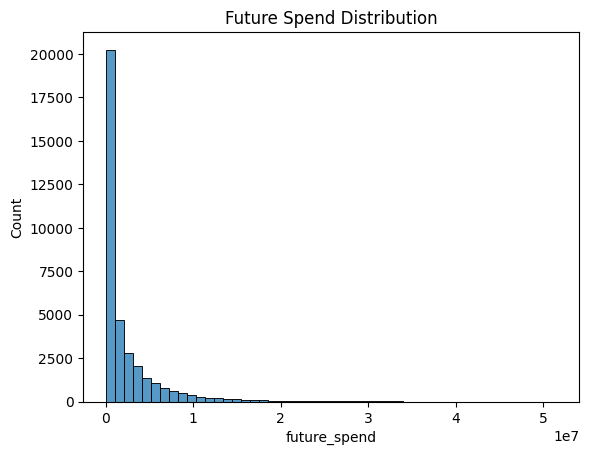

In [21]:
plt.figure()
sns.histplot(df["future_spend"], bins=50)
plt.title("Future Spend Distribution")
plt.show()


In [ ]:
# money_cols = [
#     "total_spent",
#     "avg_order_value",
#     "future_spend"
# ]

# df[[c + "_usd" for c in money_cols]] = df[[c + "_usd" for c in money_cols]].round(2)



# df["recency_days"] = df["recency"].dt.days
# df["customer_age_days"] = df["customer_age"].dt.days

# df.drop(columns=["recency", "customer_age"], inplace=True)


# df["log_future_spend"] = np.log1p(df["future_spend"])

# sns.histplot(df["log_future_spend"], bins=50)
# plt.title("Log(1 + Future Spend)")
# plt.show()